# Tesla Stock Price Prediction and Forecasting using stacked LSTM

In [2]:
# Data collection
import pandas_datareader as pdr

In [7]:
df = pdr.get_data_tiingo('TSLA', api_key = key)

C:\Users\Ujjawal\AppData\Local\Temp\ipykernel_6924\2516852847.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('TSLA', api_key = key)


In [8]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
TSLA   2019-04-22 00:00:00+00:00  262.75  269.68  262.48  269.00  12147141   
       2019-04-23 00:00:00+00:00  263.90  265.60  255.75  260.15  10943859   
       2019-04-24 00:00:00+00:00  258.66  265.32  258.00  263.85  10727454   
       2019-04-25 00:00:00+00:00  247.63  259.00  246.07  255.00  21849393   
       2019-04-26 00:00:00+00:00  235.14  246.68  231.13  246.50  22360709   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
TSLA   2019-04-22 00:00:00+00:00  17.516667  17.978667  17.498667  17.933333   
       2019-04-23 00:00:00+00:00  17.593333  17.706667  17.050000  17.343333   
       2019-04-24 00:00:00+00:00  17.244000  17.688000  17.200000  17.590000   
       2019-04-25 00:00:00+00:00  16.508667  17.266667  16.404667  17.000000   
       2019-04-26 00:00:00+00:00  15.676000  16.445333  15.408667  16.433333   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
TSLA   2019-04-22 00:00:00+00:00  182207115      0.0          1.0  
       2019-04-23 00:00:00+00:00  164157885      0.0          1.0  
       2019-04-24 00:00:00+00:00  160911810      0.0          1.0  
       2019-04-25 00:00:00+00:00  327740895      0.0          1.0  
       2019-04-26 00:00:00+00:00  335410635      0.0          1.0

In [9]:
df.tail()

close    high     low     open     volume  \
symbol date                                                                    
TSLA   2024-04-15 00:00:00+00:00  161.48  170.69  161.38  170.240  100245310   
       2024-04-16 00:00:00+00:00  157.11  158.19  153.75  156.742   96999956   
       2024-04-17 00:00:00+00:00  155.45  158.33  153.78  157.640   82439718   
       2024-04-18 00:00:00+00:00  149.93  152.20  148.70  151.250   96098830   
       2024-04-19 00:00:00+00:00  147.05  150.94  146.22  148.970   87074500   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
TSLA   2024-04-15 00:00:00+00:00    161.48   170.69  161.38  170.240   
       2024-04-16 00:00:00+00:00    157.11   158.19  153.75  156.742   
       2024-04-17 00:00:00+00:00    155.45   158.33  153.78  157.640   
       2024-04-18 00:00:00+00:00    149.93   152.20  148.70  151.250   
       2024-04-19 00:00:00+00:00    147.05   150.94  146.22  148.970   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
TSLA   2024-04-15 00:00:00+00:00  100245310      0.0          1.0  
       2024-04-16 00:00:00+00:00   96999956      0.0          1.0  
       2024-04-17 00:00:00+00:00   82439718      0.0          1.0  
       2024-04-18 00:00:00+00:00   96098830      0.0          1.0  
       2024-04-19 00:00:00+00:00   87074500      0.0          1.0

In [10]:
df.shape

(1259, 12)

In [11]:
df.to_csv('TSLA.csv')

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('TSLA.csv')

In [14]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2019-04-22 00:00:00+00:00,262.75,269.68,262.48,269.00,12147141,17.516667,17.978667,17.498667,17.933333,182207115,0.0,1.0
1,TSLA,2019-04-23 00:00:00+00:00,263.90,265.60,255.75,260.15,10943859,17.593333,17.706667,17.050000,17.343333,164157885,0.0,1.0
2,TSLA,2019-04-24 00:00:00+00:00,258.66,265.32,258.00,263.85,10727454,17.244000,17.688000,17.200000,17.590000,160911810,0.0,1.0
3,TSLA,2019-04-25 00:00:00+00:00,247.63,259.00,246.07,255.00,21849393,16.508667,17.266667,16.404667,17.000000,327740895,0.0,1.0
4,TSLA,2019-04-26 00:00:00+00:00,235.14,246.68,231.13,246.50,22360709,15.676000,16.445333,15.408667,16.433333,335410635,0.0,1.0


In [15]:
# We'll be doing forecasting of only the close prices of the stock

data = df.reset_index()['adjClose']

In [16]:
data.shape

(1259,)

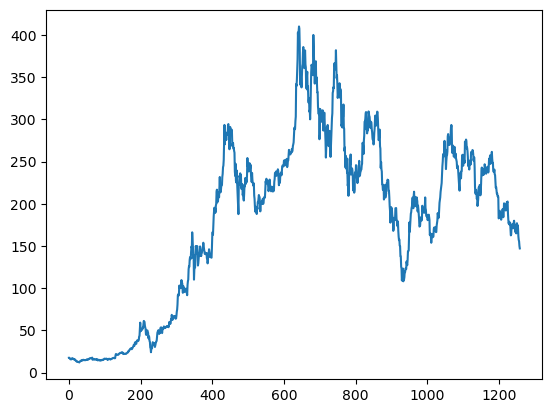

In [17]:
# Visualizing the close price over the years

import matplotlib.pyplot as plt
plt.plot(data)

In [18]:
# LSTM are sensitive to the scale of data, so we'll be using MinMaxScaler to resolve that issue

In [19]:
import numpy as np

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [22]:
data.shape

(1259, 1)

In [23]:
# Splitting dataset into training and testing data

In [24]:
train_size = int(len(data)*0.7)
test_size = len(data)-train_size

In [25]:
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:1]

In [26]:
train_size, test_size

(881, 378)

In [27]:
# Convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [28]:
time_step = 100
train_X, train_Y = create_dataset(train_data,time_step)
test_X, test_Y = create_dataset(test_data, time_step)

In [30]:
train_X

array([[0.01403214, 0.01422475, 0.01334711, ..., 0.00884671, 0.00947479,
        0.01141095],
       [0.01422475, 0.01334711, 0.01149972, ..., 0.00947479, 0.01141095,
        0.01120494],
       [0.01334711, 0.01149972, 0.0094078 , ..., 0.01141095, 0.01120494,
        0.01109272],
       ...,
       [0.56412107, 0.52600082, 0.53521266, ..., 0.53044763, 0.53017127,
        0.51394169],
       [0.52600082, 0.53521266, 0.49607073, ..., 0.53017127, 0.51394169,
        0.51580081],
       [0.53521266, 0.49607073, 0.52172988, ..., 0.51394169, 0.51580081,
        0.527056  ]])

In [31]:
train_X.shape, train_Y.shape

((780, 100), (780,))

In [32]:
test_X.shape, test_Y.shape

((277, 100), (277,))

In [33]:
# reshaping into 3D, which is required for LSTM - [samples, time steps, features]

In [34]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)

In [35]:
# Creating the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.fit(train_X, train_Y, validation_data = (test_X, test_Y), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100

13/13 [==============================] - 13s 348ms/step - loss: 0.0872 - val_loss: 0.0082
Epoch 2/100
13/13 [==============================] - 2s 160ms/step - loss: 0.0132 - val_loss: 0.0113
Epoch 3/100
13/13 [==============================] - 3s 212ms/step - loss: 0.0064 - val_loss: 0.0050
Epoch 4/100
13/13 [==============================] - 2s 178ms/step - loss: 0.0049 - val_loss: 0.0029
Epoch 5/100
13/13 [==============================] - 3s 195ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 6/100
13/13 [==============================] - 2s 190ms/step - loss: 0.0039 - val_loss: 0.0029
Epoch 7/100
13/13 [==============================] - 2s 176ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 8/100
13/13 [==============================] - 2s 181ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 9/100
13/13 [==============================] - 3s 205ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 10/100
13/13 [==============================] - 2s 179ms/step - loss: 0.0034 - val_

13/13 [==============================] - 2s 193ms/step - loss: 8.4542e-04 - val_loss: 5.8234e-04
Epoch 79/100
13/13 [==============================] - 2s 189ms/step - loss: 8.9476e-04 - val_loss: 7.7586e-04
Epoch 80/100
13/13 [==============================] - 3s 197ms/step - loss: 9.5734e-04 - val_loss: 9.7173e-04
Epoch 81/100
13/13 [==============================] - 2s 188ms/step - loss: 0.0012 - val_loss: 7.4230e-04
Epoch 82/100
13/13 [==============================] - 2s 185ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 83/100
13/13 [==============================] - 2s 167ms/step - loss: 0.0011 - val_loss: 6.4618e-04
Epoch 84/100
13/13 [==============================] - 2s 186ms/step - loss: 8.3857e-04 - val_loss: 5.5547e-04
Epoch 85/100
13/13 [==============================] - 2s 192ms/step - loss: 8.0489e-04 - val_loss: 5.2923e-04
Epoch 86/100
13/13 [==============================] - 2s 192ms/step - loss: 8.9452e-04 - val_loss: 5.6771e-04
Epoch 87/100
13/13 [===================

In [39]:
# Prediction and checing performance metrics
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

9/9 [==============================] - 1s 55ms/step


In [40]:
# Transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [41]:
# Checking performance of the model for the training data

import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
math.sqrt(mean_squared_error(train_Y, train_predict))

219.4303472289397

In [42]:
# RMSE for test data
math.sqrt(mean_squared_error(test_Y, test_predict))

223.97753550273373

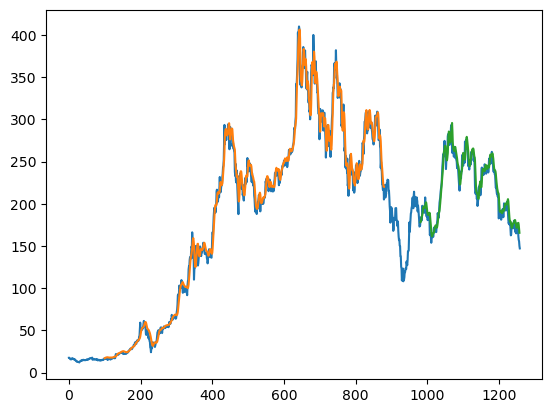

In [43]:
# Plotting the predicted values alongside the original values

# Shift train predictions for plotting

look_back = 100
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting

testPredictPlot = np.empty_like(data)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

# Plot baseline and predictions

plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Here, the blue line shows the original values of dataset.

Orange line = Model's prediction on Training data.

Green line = Model's prediction on Testing data.

In [44]:
# Predicting the stock prices of next 30 days and then plotting it

In [45]:
len(test_data)

378

In [46]:
input_x = test_data[278:].reshape(1,-1)

In [47]:
input_x.shape

(1, 100)

In [48]:
# Converting the data into list

temp_data = list(input_x)
temp_data = temp_data[0].tolist()

In [49]:
temp_data

[0.5631328949616651,
 0.5898639663148647,
 0.583382183975461,
 0.573182169906477,
 0.5700417714862233,
 0.5618767355935637,
 0.5697654164252409,
 0.5713984236037729,
 0.5796137058711566,
 0.5826284883546001,
 0.5723279815361679,
 0.5654693513863338,
 0.5711974381048766,
 0.6007423064426236,
 0.6068974873463209,
 0.6033299947409126,
 0.616243313044996,
 0.5909191401840699,
 0.6094098060825238,
 0.6044856613595659,
 0.6147107986159122,
 0.6268452981117725,
 0.6060935453507359,
 0.5942856472905819,
 0.5941349081664097,
 0.5690870903664661,
 0.5677806846236406,
 0.5666752643797113,
 0.574111727838872,
 0.5603190979771178,
 0.5577565328661908,
 0.5408737509589068,
 0.519946135886336,
 0.522508700997263,
 0.5115549913074181,
 0.5023347815455531,
 0.5031136003537761,
 0.4945968398380481,
 0.495451028208357,
 0.49215989066393123,
 0.4288494585116162,
 0.4304070961280621,
 0.4497017040221009,
 0.4513598343879949,
 0.44055686382232206,
 0.4445012042381608,
 0.44211450143876796,
 0.42490511809577

In [50]:
# Predicting stock prices for next 30 days

from numpy import array
list_output = []
n_steps = 100
i = 0

while(i<30):
    if (len(temp_data)>150):
        input_x = np.array(temp_data[1:])
        print("{} day input {}".format(1, input_x))
        input_x = input_x.reshape(1,-1)
        input_x = input_x.reshape((1, n_steps, 1))
        yhat = model.predict(input_x, verbose = 0)
        print("{} day output {}".format(1, yhat))
        temp_data.extend(yhat[0].tolist())
        temp_data = temp_data[1:]
        list_output.extend(yhat.tolist())
        i = i+1
        
    else:
        input_x = input_x.reshape((1, n_steps, 1))
        yhat = model.predict(input_x, verbose =0)
        print(yhat[0])
        temp_data.extend(yhat[0].tolist())
        print(len(temp_data))
        list_output.extend(yhat.tolist())
        i=i+1

print(list_output)

[0.36212248]
101
[0.36212248]
102
[0.36212248]
103
[0.36212248]
104
[0.36212248]
105
[0.36212248]
106
[0.36212248]
107
[0.36212248]
108
[0.36212248]
109
[0.36212248]
110
[0.36212248]
111
[0.36212248]
112
[0.36212248]
113
[0.36212248]
114
[0.36212248]
115
[0.36212248]
116
[0.36212248]
117
[0.36212248]
118
[0.36212248]
119
[0.36212248]
120
[0.36212248]
121
[0.36212248]
122
[0.36212248]
123
[0.36212248]
124
[0.36212248]
125
[0.36212248]
126
[0.36212248]
127
[0.36212248]
128
[0.36212248]
129
[0.36212248]
130
[[0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.36212247610092163], [0.362

In [51]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [52]:
len(data)

1259

In [53]:
df2 = data.tolist()
df2.extend(list_output)

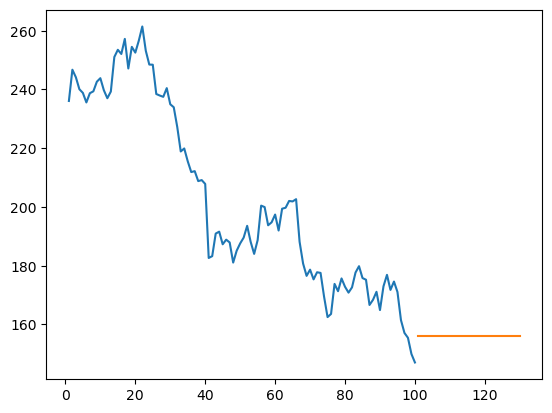

In [55]:
plt.plot(day_new, scaler.inverse_transform(data[1159:]))
plt.plot(day_pred, scaler.inverse_transform(list_output))

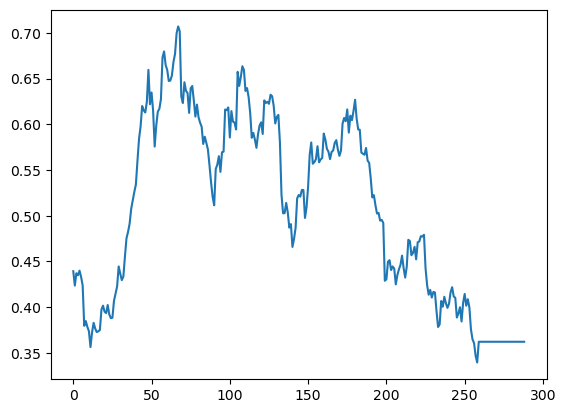

In [56]:
df2 = data.tolist()
df2.extend(list_output)
plt.plot(df2[1000:])

So, the stock price of tesla will be around $155 for the next 30 days